In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Data Load
df_train = pd.read_csv('HF_traindata.csv')
df_test = pd.read_csv('HF_testdata.csv')

/tmp/ipython-input-4-886134876.py:1: DtypeWarning: Columns (125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('HF_traindata.csv')


In [5]:
df_train.head()
df_test.head()

,_id,question,answer,options.A,options.B,options.C,options.D,meta_info,answer_idx,metamap_phrases[0],...,metamap_phrases[167],metamap_phrases[168],metamap_phrases[169],metamap_phrases[170],metamap_phrases[171],metamap_phrases[172],metamap_phrases[173],metamap_phrases[174],metamap_phrases[175],metamap_phrases[176]
0,67cc4ea14107febf862843e3,A junior orthopaedic surgery resident is compl...,Tell the attending that he cannot fail to disc...,Disclose the error to the patient and put it i...,Tell the attending that he cannot fail to disc...,Report the physician to the ethics committee,Refuse to dictate the operative report,step1,B,junior orthopaedic surgery resident,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67cc4ea14107febf862843e4,A 67-year-old man with transitional cell carci...,Cross-linking of DNA,Inhibition of proteasome,Hyperstabilization of microtubules,Generation of free radicals,Cross-linking of DNA,step1,D,67 year old man,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67cc4ea14107febf862843e5,Two weeks after undergoing an emergency cardia...,Cholesterol embolization,Renal papillary necrosis,Cholesterol embolization,Eosinophilic granulomatosis with polyangiitis,Polyarteritis nodosa,step2&3,B,Two weeks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67cc4ea14107febf862843e6,A 39-year-old woman is brought to the emergenc...,"Lactose-fermenting, gram-negative rods forming...","Coagulase-positive, gram-positive cocci formin...","Encapsulated, gram-negative coccobacilli formi...","Spore-forming, gram-positive bacilli forming y...","Lactose-fermenting, gram-negative rods forming...",step1,D,year old woman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67cc4ea14107febf862843e7,A 35-year-old man comes to the physician becau...,Ketotifen eye drops,Erythromycin ointment,Ketotifen eye drops,Warm compresses,Fluorometholone eye drops,step2&3,B,35 year old man,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_train.columns

Index(['id', 'question', 'answer', 'options.A', 'options.B', 'options.C',
       'options.D', 'meta_info', 'answer_idx', 'metamap_phrases[0]',
       ...
       'metamap_phrases[174]', 'metamap_phrases[175]', 'metamap_phrases[176]',
       'metamap_phrases[177]', 'metamap_phrases[178]', 'metamap_phrases[179]',
       'metamap_phrases[180]', 'metamap_phrases[181]', 'metamap_phrases[182]',
       'metamap_phrases[183]'],
      dtype='object', length=193)

In [7]:
df_test.columns

Index(['_id', 'question', 'answer', 'options.A', 'options.B', 'options.C',
       'options.D', 'meta_info', 'answer_idx', 'metamap_phrases[0]',
       ...
       'metamap_phrases[167]', 'metamap_phrases[168]', 'metamap_phrases[169]',
       'metamap_phrases[170]', 'metamap_phrases[171]', 'metamap_phrases[172]',
       'metamap_phrases[173]', 'metamap_phrases[174]', 'metamap_phrases[175]',
       'metamap_phrases[176]'],
      dtype='object', length=186)

In [8]:
df_copy_train  = df_train.copy()
df_copy_test  = df_test.copy()

In [9]:
df_train = df_train[['question','answer']]
df_test = df_test[['question','answer']]

In [10]:
df_train.head()

,question,answer
0,A 23-year-old pregnant woman at 22 weeks gesta...,Nitrofurantoin
1,A 3-month-old baby died suddenly at night whil...,Placing the infant in a supine position on a f...
2,A mother brings her 3-week-old infant to the p...,Abnormal migration of ventral pancreatic bud
3,A pulmonary autopsy specimen from a 58-year-ol...,Thromboembolism
4,A 20-year-old woman presents with menorrhagia ...,Von Willebrand disease


In [11]:
df_test.head()

,question,answer
0,A junior orthopaedic surgery resident is compl...,Tell the attending that he cannot fail to disc...
1,A 67-year-old man with transitional cell carci...,Cross-linking of DNA
2,Two weeks after undergoing an emergency cardia...,Cholesterol embolization
3,A 39-year-old woman is brought to the emergenc...,"Lactose-fermenting, gram-negative rods forming..."
4,A 35-year-old man comes to the physician becau...,Ketotifen eye drops


In [12]:
df_train.isnull().sum()
df_test.isnull().sum()

,0
question,0
answer,0


In [13]:
#train data null values
print(df_train['answer'].isna().sum())
print(df_train['question'].isna().sum())

#test data null values

print(df_test['answer'].isna().sum())
print(df_test['question'].isna().sum())


1
0
0
0


In [14]:
most_repeated_value = df_train['answer'].mode()[0]
df_train['answer'].fillna(most_repeated_value, inplace=True)

/tmp/ipython-input-14-542236318.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['answer'].fillna(most_repeated_value, inplace=True)


In [15]:
#train data null values
print(df_train['answer'].isna().sum())
print(df_train['question'].isna().sum())

#test data null values

print(df_test['answer'].isna().sum())
print(df_test['question'].isna().sum())

0
0
0
0


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

def clean_text_advanced(text):
    # Lowercase and remove non-letter characters
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)

    # Load the punkt tokenizer explicitly
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

    # Tokenize
    words = tokenizer.tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    #word lemmatising
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join back
    return ' '.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
df_train['question'] = df_train['question'].apply(clean_text_advanced)
df_train['answer'] = df_train['answer'].apply(clean_text_advanced)

In [18]:
df_test['answer'] = df_test['answer'].apply(clean_text_advanced)
df_test['question'] = df_test['question'].apply(clean_text_advanced)

In [19]:
# Question length
df_train['q_length'] = df_train['question'].apply(lambda x: len(x.split()))
df_test['q_length'] = df_test['question'].apply(lambda x: len(x.split()))

In [20]:
# Question length
df_train['a_length'] = df_train['answer'].apply(lambda x: len(x.split()))
df_test['a_length'] = df_test['answer'].apply(lambda x: len(x.split()))

In [21]:
df_train.head()

,question,answer,q_length,a_length
0,a yearold pregnant woman at weeks gestation p...,nitrofurantoin,91,1
1,a monthold baby died suddenly at night while a...,placing the infant in a supine position on a f...,46,13
2,a mother brings her weekold infant to the pedi...,abnormal migration of ventral pancreatic bud,82,6
3,a pulmonary autopsy specimen from a yearold wo...,thromboembolism,94,1
4,a yearold woman presents with menorrhagia for ...,von willebrand disease,96,3


In [22]:
df_test.head()

,question,answer,q_length,a_length
0,a junior orthopaedic surgery resident is compl...,tell the attending that he cannot fail to disc...,100,11
1,a yearold man with transitional cell carcinoma...,crosslinking of dna,67,3
2,two weeks after undergoing an emergency cardia...,cholesterol embolization,116,2
3,a yearold woman is brought to the emergency de...,lactosefermenting gramnegative rods forming pi...,110,9
4,a yearold man comes to the physician because o...,ketotifen eye drops,111,3


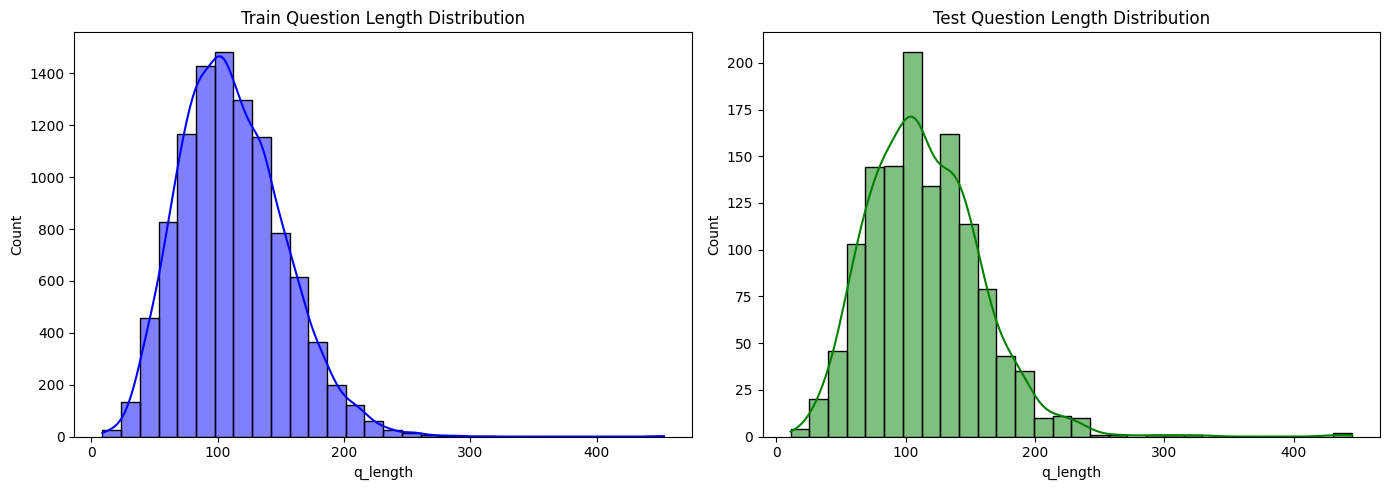

In [23]:
# Plotting question length
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_train['q_length'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Train Question Length Distribution")
sns.histplot(df_test['q_length'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title("Test Question Length Distribution")
plt.tight_layout()
plt.show()

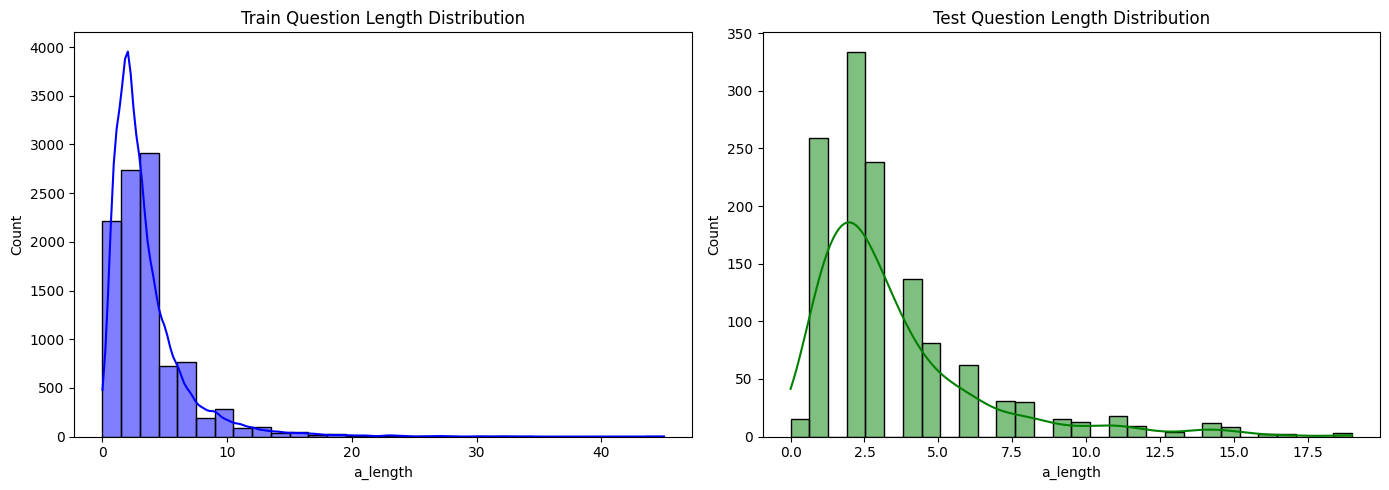

In [24]:
# Plotting answer length
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_train['a_length'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Train Question Length Distribution")
sns.histplot(df_test['a_length'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title("Test Question Length Distribution")
plt.tight_layout()
plt.show()

In [25]:
HF_new_train = df_train[['question','answer']]
HF_new_test = df_test[['question','answer']]

In [26]:
HF_new_test.to_csv('HF_new_testdata.csv')
HF_new_train.to_csv('HF_new_traindata.csv')